Привет, Элина!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку.

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2
    
#### Успех
    
Спасибо тебе за исправления замечаний. Вот теперь проект я принимаю и желаю тебе успехов в дальнешей учебе. Ты точно справишься, я уверен в этом. 


**<font color="purple">Вячеслав ,спасибо за комментарии! Я постараюсь все скорректировать</font>**

Приступаем к работе над проектом ,целью которого является анализ данных интернет-магазина компьютерных игр «Стримчик».Необходимо выявить закономерности ,определяющие успешность игры . Это позволит выявить потенциально популярный продукт и спланировать рекламные кампании.Мы имеем данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

In [72]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошбика
    
У тебя здесь две ошибки есть. Первая при вызове библиотеки. Надо испортировать из scipy.stats.

Вторая ошибка, если у тебя функция идет по режиму except, то у тебя data нигде не сохраняется и print() не сработает. 
</div 

**<font color="purple">Исправила название библиотеки.Убрала метод try</font>**

In [73]:
data.info()#Посмотрим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем название столбцов к нижнему регистру так как они не соответсвуют общепринятому правилу

In [74]:
data = data.rename(columns=str.lower)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Достатчоно хороший метод. 
</div 

In [75]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

# Преобразуем типы данных

In [76]:

data['year_of_release'] = data['year_of_release'].astype('Int32')# преобразуем год в int


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для экономии вычислительной памяти лучше всего перевести в int32 
</div 

**<font color="purple">Спасибо за совет,поправила</font>**

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Вот а теперь другое дело. 
</div 

In [77]:
data['user_score'].unique()#посмотрим уникальные значения столбца user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди значений есть 'tbd'-данная аббревиатура означает To Be Determined (будет определено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.Фактически это значит что информации нет.Как мы видим 'user_score' имеет тип данных object ,который необходимо поменять на float.Но для начала необходимо преобразовать 'tbd' в nan.


In [78]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [79]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [80]:
data['user_score'] = pd.to_numeric(data['user_score'])#object преобразуем в float64 для дальнейшей корректной
#работы с данными 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Для удобства, почему бы и нет. 
</div 

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.4+ MB


# Поработаем с пустыми значениями 

1.'name'  - удалим строки полностью с пропущенным названием ,так как заменить на другое значение невозможно,не зная точного названия.Название игры важный параметр без которого анализ не будет достоверным.Возможно данные не внесены ошибочно.
2.'year_of_release' -определить или заменить данные пропуски невозможно если не знать точно год выпуска ,удалим строки с пустыми значениями.Возможно у некоторых игр неизвестна точная дата выпуска поэтому данные не внесены.
3.'critic_score'-пропуски свидетельсвуют о возможном отсутсвии оценок от критиков,заменять данные значения например средним значением нецелесообразно и это может привести к некорректному анализу,заменим пустые значения 0
4.'user_score' - пропуски свидетельсвуют о возможном отсутсвии оценок от пользователей,заменять данные значения например средним значением нецелесообразно и это может привести к некорректному анализу,заменим пустые значения 0
5.'rating' -заменить данные о возрастных ограничениях нет возможности, удалить строки полностью считаю нецелесообразно ,так как остальные данные могут быть полезны для анализа, поэтому заменим значения на unknown

In [82]:
print(data.loc[data['name'].isnull()])#посмотрим строки где пропущенны названия ,их всего 2 и в них также пропущенны значения жанра
#можем удалить строки полностью

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Тут согласен с твоим решением. Смотри, для вывода результата необязательно использовать команду print(). Поскольку это последняя и единственная строчка кода, то результат сработает и так. 
</div 

In [83]:
data = data.dropna(subset=['name','year_of_release'])

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.5+ MB


In [85]:
data['rating'] = data['rating'].fillna('unknown')

In [86]:
#Заменим пропуски 0 
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здесь согласен с тобой. Оптимально не сделаешь замену для пропусков здесь, а вот значения-заглушки хорошее решение. 
</div 

In [87]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,unknown


In [88]:
data.info()#проверим заполнены ли все значения 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.5+ MB


In [89]:
data[data.duplicated()].head() #проверим наличие явных дубликатов ,они отсутствуют

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [90]:
data['rating'].unique()#посмотрим уникальные значения рейтинга

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

В уникальных значениях 'rating' представлены возрастные категории:
«E» («Everyone») — «Для всех»
«M» («Mature») — «Для взрослых»
«T» («Teen») — «Подросткам»
«E10+» — «Для всех от 10 лет и старше»
«K-A» («Kids to Adults»)— «Для детей и взрослых»
«AO» («Adults Only 18+») — «Только для взрослых»
«EC» («Early childhood») — «Для детей младшего возраста»
«RP» («Rating Pending») — «Рейтинг ожидается»

In [91]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']#выведем сумму по всем странам в отдельную колонку

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут все просто и понятно. 
</div 

In [92]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,unknown,28.31


# Приступим к исследовательскому анализу данных

In [93]:
data.groupby('year_of_release')['name'].count()


year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Наиболее высокие показатели выпуска игр наблюдаются с 2006-2011 года,с 2012 идет резкий спад.

In [94]:
#выведем 10 платформ с 
#наибольшими суммарными продажами 
print('Платформы с наибольшими продажами')
print(data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10))

Платформы с наибольшими продажами
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


Построим диаграммы для каждой платформы из 10

<AxesSubplot:xlabel='year_of_release'>

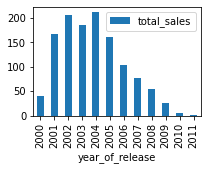

In [95]:
data[data['platform'] == 'PS2'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar',figsize=(3,2))


<AxesSubplot:xlabel='year_of_release'>

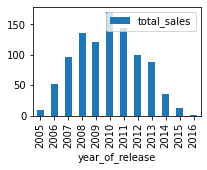

In [96]:
data[data['platform'] == 'X360'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar',figsize=(3,2))


<AxesSubplot:xlabel='year_of_release'>

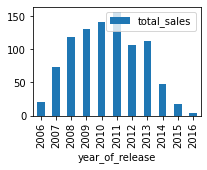

In [97]:
data[data['platform'] == 'PS3'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar',figsize=(3,2))


<AxesSubplot:xlabel='year_of_release'>

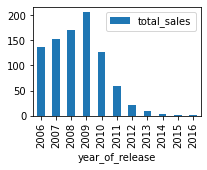

In [98]:
data[data['platform'] == 'Wii'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar',figsize=(3,2))


<AxesSubplot:xlabel='year_of_release'>

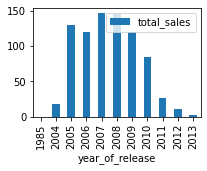

In [99]:
data[data['platform'] == 'DS'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar',figsize=(3,2))


<AxesSubplot:xlabel='year_of_release'>

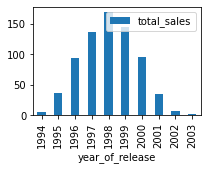

In [100]:
data[data['platform'] == 'PS'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar',figsize=(3,2))


<AxesSubplot:xlabel='year_of_release'>

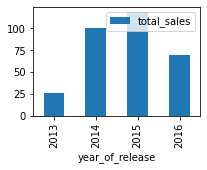

In [101]:
data[data['platform'] == 'PS4'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar',figsize=(3,2))


<AxesSubplot:xlabel='year_of_release'>

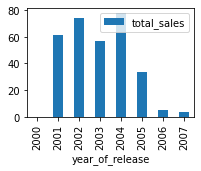

In [102]:
data[data['platform'] == 'GBA'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar',figsize=(3,2))


<AxesSubplot:xlabel='year_of_release'>

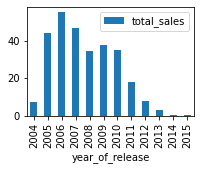

In [103]:
data[data['platform'] == 'PSP'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar',figsize=(3,2))


<AxesSubplot:xlabel='year_of_release'>

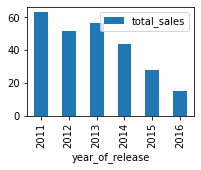

In [104]:
data[data['platform'] == '3DS'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar',figsize=(3,2))


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Хорошие графики у тебя получились. Я бы только в идеале вывел и через цикл. Пришлось бы меньше копипастить. 
</div 

Средний срок существования платформы 5-10 лет.В основном платформы с наибольшими продажами были основаны в 2000-2010гг

Но для дальнейшего анализа возмем данные за 2014-2016гг

<AxesSubplot:xlabel='year_of_release'>

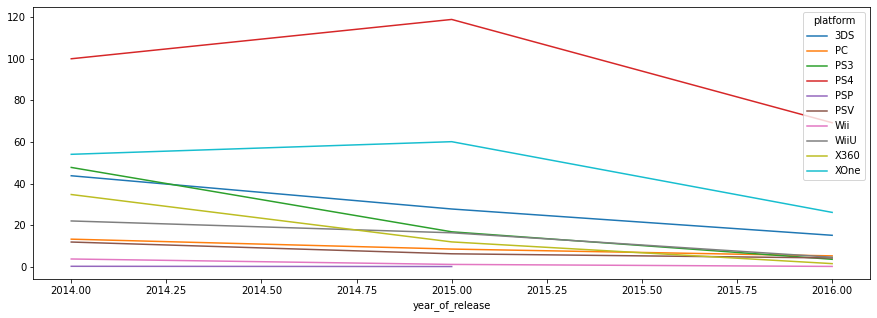

In [105]:
actual_period = data.loc[data['year_of_release']>=2014]
actual_period.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum').plot(kind='line',figsize=(15, 5))

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Все так и есть. У нас падающая тенденцию. С актуальным периодом согласен. 
</div 

По графику наблюдаем общий спад с начала 2015 года, в лидирующих позициях такие платформы как PS4,XOne,3DS.Данные платформы можно считать прибыльными.

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

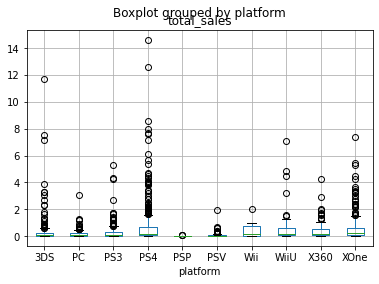

In [106]:
actual_period.boxplot(column = 'total_sales', by = 'platform')

(0.0, 1.0)

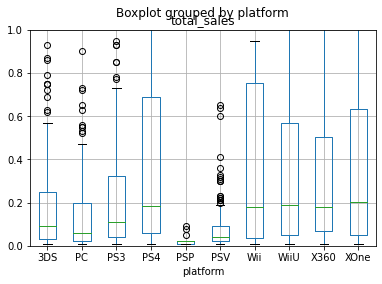

In [107]:
actual_period.boxplot(column = 'total_sales', by = 'platform')
plt.ylim([0,1])

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
К сожалению, на этом графике видны только выбросы, и совсем не видны медиана и 75% квантиль. Для более обоснованных выводов нужно сделать дополнительный график, где будет отображена только нижняя часть boxplot-ов. Этого можно добиться, например, задав параметр ylim.
</div 

**<font color="purple">Дополнительный график есть</font>**

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех

Вот теперь то, что нужно. 
</div

По данному графику мы можем увидеть что у платформы PS4 и 3DS есть выделяющиеся выбросы, возможно это связанно с выпуском новых игр,рекламными компаниями и активными продажами.

Для анализа влияния отзывов на продажи возьмем самую успешную платформу PS4.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

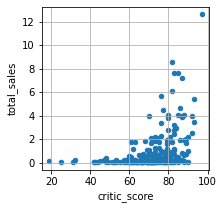

In [108]:
PS4=actual_period.query('platform=="PS4" and critic_score>0 and user_score>0')#сохраним данные 
#по одной платформе в отдельную переменную и отфильтруем значения 0 в оценках
#сформируем диаграмму рассеяния по оценкам
PS4.plot(x ='critic_score', y ='total_sales', kind ='scatter',grid=True,figsize=(3,3))

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

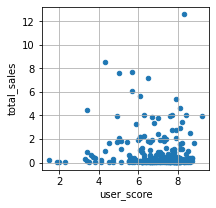

In [109]:
PS4.plot(x='user_score', y='total_sales', kind='scatter',grid=True,figsize=(3,3))

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Тут стоило бы убрать с графика значения-заглушки, которыми ты заменяла пропуски. 
</div 

**<font color="purple">Убрала 0 значения из оценок</font>**

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Отлично. 
</div

In [110]:
print('Корреляция оценка пользователей/продажи:',PS4['user_score'].corr(PS4['total_sales']))#выведем показатели корреляции 
print('Корреляция оценка критиков/продажи:',PS4['critic_score'].corr(PS4['total_sales'])) 

Корреляция оценка пользователей/продажи: -0.04318585997193634
Корреляция оценка критиков/продажи: 0.40190287811475334


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для подсчета корреляции тоже полезно будет убрать 0
</div 

Показатели корреляции отражают слабую линейную зависимость общих продаж от оценок пользователей .Влияние оценок критиков более ощутимо.График также не показывает особой взаимосвязи. Это может говорить о том, что между факторами нелинейная взаимосвязь.Либо на расчет сильно влияют выбросы.
Для сравнения возьмем показатели еще у нескольких платформ.

In [111]:
XOne = actual_period.query('platform == "XOne"and critic_score>0 and user_score>0')
DS = actual_period.query('platform == "3DS"and critic_score>0 and user_score>0')
PS3 = actual_period.query('platform == "PS3"and critic_score>0 and user_score>0')

Корреляция оценка пользователей/продажи: -0.0917343450331075
Корреляция оценка критиков/продажи: 0.42211185105557647


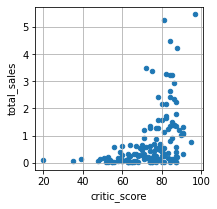

In [112]:
XOne.plot(x='critic_score', y='total_sales', kind='scatter',grid=True,figsize=(3,3))
print('Корреляция оценка пользователей/продажи:',XOne['user_score'].corr(XOne['total_sales']))
print('Корреляция оценка критиков/продажи:',XOne['critic_score'].corr(XOne['total_sales'])) 

Корреляция оценка пользователей/продажи: 0.15659516181359956
Корреляция оценка критиков/продажи: 0.44657460493190704


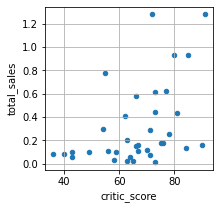

In [113]:
PS3.plot(x='critic_score', y='total_sales', kind='scatter',grid=True,figsize=(3,3))
print('Корреляция оценка пользователей/продажи:',PS3['user_score'].corr(PS3['total_sales']))
print('Корреляция оценка критиков/продажи:',PS3['critic_score'].corr(PS3['total_sales']))

Корреляция оценка пользователей/продажи 0.2798498792503281
Корреляция оценка критиков/продажи: 0.28468579095782925


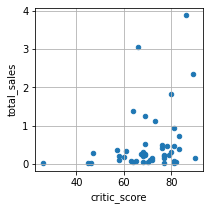

In [114]:
DS.plot(x='critic_score', y='total_sales', kind='scatter',grid=True,figsize=(3,3))
print('Корреляция оценка пользователей/продажи',DS['user_score'].corr(DS['total_sales']))
print('Корреляция оценка критиков/продажи:',DS['critic_score'].corr(DS['total_sales']))

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Выводы на основе данных с нескольких платформ выглядят убедительнее.  
</div 

Графики по другим платформам также показывают слабое влияние отзывов на продажи 

Посмотрим на общее распределение игр по жанрам

In [115]:
actual_period.groupby('genre')['name'].count().sort_values(ascending=False)#посмотрим на самые топовые жанры 
#в соответсвии с количеством выпущенных игр 

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

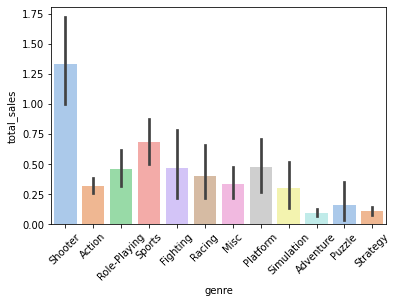

In [116]:
#а теперь посмотрим на распределение жанров по общим продажам
barplot=sns.barplot(data = actual_period, x = actual_period['genre'], y = actual_period['total_sales'],palette="pastel")
barplot=barplot.set_xticklabels(barplot.get_xticklabels(),rotation = 45)

Про продажам выделяется явный лидер среди жанров -Shooter.Также можно отметить низкие продажи у жанров:Adventure,Strategy,Puzzle

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Классно, что ты рассмотрел именно медианные продажи. По ним судить более правильно, чем по суммарным. 
</div 

# Попробуем составить портрет пользователя каждого региона

# Северная Америка

Топ-5 платформ в Северной Америке
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64


Text(0, 0.5, 'Продажи копий (млн.)')

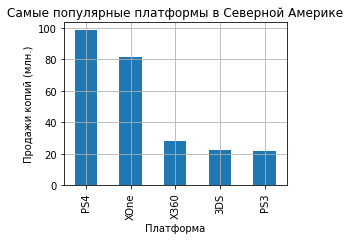

In [117]:
#Посмотрим на список самых популярных платформ 
platforms_na = actual_period.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print('Топ-5 платформ в Северной Америке')
print(platforms_na)
platforms_na.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(4,3), grid=True, title = 'Самые популярные платформы в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи копий (млн.)')

Топ-5 жанров в Северной Америке
genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64


<AxesSubplot:ylabel='na_sales'>

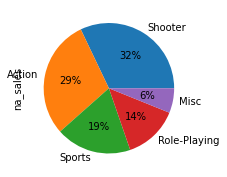

In [118]:
#Посмотрим на список самых популярных жанров 
genre_na = actual_period.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print('Топ-5 жанров в Северной Америке')
print(genre_na)
genre_na.plot(x = 'genre', y = 'na_sales', kind = 'pie', figsize=(4,3),autopct='%1.0f%%')

В Северной Америке самые популярные платформы PS4 и XOne,по жанрам преобладают Shooter и Action. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Отлично, о Северной америке мы получил представления. 
</div 

# Япония

Топ-5 платформ в Японии
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


<AxesSubplot:title={'center':'Самые популярные платформы в Японии'}, xlabel='platform'>

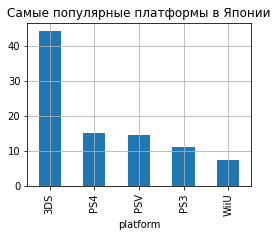

In [119]:
platforms_jp = actual_period.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print('Топ-5 платформ в Японии')
print(platforms_jp)
platforms_jp.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(4,3), grid=True, title = 'Самые популярные платформы в Японии')

Топ-5 жанров в Японии
genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64


<AxesSubplot:ylabel='jp_sales'>

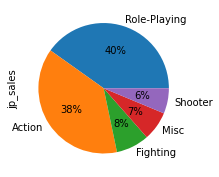

In [120]:
genre_jp = actual_period.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print('Топ-5 жанров в Японии')
print(genre_jp)
genre_jp.plot(x = 'genre', y = 'jp_sales', kind = 'pie', figsize=(4,3),autopct='%1.0f%%')

В Японии лидирует 3DS .Это говорит о том ,что население предпочитает свою японскую платформу.Предпочитаемые жанры Role-Playing и Action

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А вот Япония наиболее уникальна в сравнении с Северной Америки. 
</div 

# Европа

Топ-5 платформ в Европе
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64


Text(0, 0.5, 'Продажи копий (млн.)')

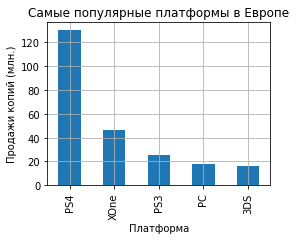

In [121]:
platforms_eu = actual_period.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print('Топ-5 платформ в Европе')
print(platforms_eu)
platforms_eu.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(4,3), grid=True, title = 'Самые популярные платформы в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи копий (млн.)')

Топ-5 жанров в Европе
genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64


<AxesSubplot:ylabel='eu_sales'>

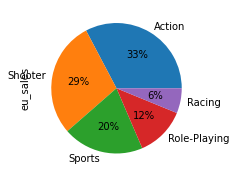

In [122]:
genre_eu = actual_period.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print('Топ-5 жанров в Европе')
print(genre_eu)
genre_eu.plot(x = 'genre', y = 'eu_sales', kind = 'pie', figsize=(4,3),autopct='%1.0f%%')

Европейские пользователи предпочитают японскую PS4,менее популярна американская XOne.По жанрам предпочтения- Shooter и Action  

Можно сделать вывод, что предпочтения европейских и американских пользователей схожи по жанрам Shooter и Action,в отличии от японских пользователей которые предпочитают Role-Playing,видимо причина в том, что большинсво игр данного жанра выпущено в Японии.

 Посмотрим как влияет рейтинг ESRB на продажи в отдельном регионе

Text(0, 0.5, 'Продажи копий (млн.)')

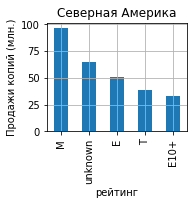

In [123]:
rating_na = actual_period.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(2.5,2), grid=True,title = 'Северная Америка')
plt.xlabel('рейтинг')
plt.ylabel('Продажи копий (млн.)')

Text(0, 0.5, 'Продажи копий (млн.)')

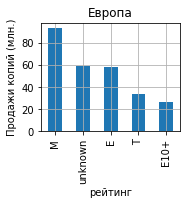

In [124]:
rating_eu = actual_period.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(2.5,2), grid=True,title = 'Европа')
plt.xlabel('рейтинг')
plt.ylabel('Продажи копий (млн.)')

Text(0, 0.5, 'Продажи копий (млн.)')

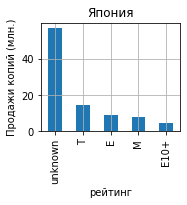

In [125]:
rating_jp = actual_period.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(2.5,2), grid=True,title = 'Япония')
plt.xlabel('рейтинг')
plt.ylabel('Продажи копий (млн.)')

In [126]:
total_rating = actual_period.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
total_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
unknown,58.95,56.90,64.72


Возрастной рейтинг влияет на продажи, как показывают данные в Европе и Северной Америке основные пользователи находятся в категориях «E» («Everyone») — «Для всех» и «M» («Mature») — «Для взрослых».Сложнее сделать выводы про Японию так как более 50млн. копий продано в категориях не указанных в рейтинге.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Очень хороший разбор регионов. Здорово получилось. 
</div 

# Проверим некоторые гипотезы

Сформулируем гипотезы
Нулевая гипотеза:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.Если 
Альтернативная гипотеза:Средние пользовательские рейтинги платформ Xbox One и PC разные.Альтернативная гипотеза будет  верной если отбрасывается нулевая гипотеза.


In [127]:
#сделаем выборки по платформам для дальнейшей проверки гипотез
Xbox_One = actual_period[(actual_period['platform'] == 'XOne') & (actual_period['user_score'] > 0)]['user_score']
PC = actual_period[(actual_period['platform'] == 'PC') &  (actual_period['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:',Xbox_One.mean())
print('Средний пользовательский рейтинг платформы PC',PC.mean())
#Так как мы имеем выборки из двух генеральных совокупностей используем st.ttest_ind 
alpha = 0.05
results = st.ttest_ind(Xbox_One,PC, equal_var = True)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг платформы Xbox One: 6.594545454545456
Средний пользовательский рейтинг платформы PC 6.298360655737705
p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Гипотезы сформулированы, c выводами согласен. 
</div 

Проверим вторую гипотезу
Нулевая гипотеза:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
Альтернативная гипотеза :Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

In [128]:
#сделаем выборки по жанрам для дальнейшей проверки гипотез
Action = actual_period[(actual_period['genre'] == 'Action') &  (actual_period['user_score'] > 0)]['user_score']
Sports = actual_period[(actual_period['genre'] == 'Sports') &  (actual_period['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:',Action.mean())
print('Средний пользовательский рейтинг жанра Sports',Sports.mean())
#Так как мы имеем выборки из двух генеральных совокупностей используем st.ttest_ind 
alpha = 0.05
results = st.ttest_ind(Xbox_One,PC, equal_var = True)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг жанра Action: 6.760606060606061
Средний пользовательский рейтинг жанра Sports 5.2251968503937
p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Ну и здесь с Гипотезой отлично получилось разобраться. 
</div 

Общий вывод:
Перед нами была поставлена задача-выявить закономерности ,определяющие популярность игр.Для проекта были взяты данные об обьемах продаж игр в разных регионах, оценки пользователей и экспертов, жанры и платформы.Для изучения данных мы взяли период с 2014 по 2016гг. Исследовательский анализ данных показал,что платформы существуют в основном 5-10 лет.Самыми популярными и продаваемыми платформами в мире являются японская платформа PS4 (год выпуска -2013) и  американская XOne(год выпуска -2013).Несмотря на общий спад продаж с 2015 г. данные платформы лидируют по обьему продажй(за 2014-2016гг.PS4-288.15 млн.проданных копий ,XOne-140.36млн.проданных копий)Наибольшее количество выпущенных игр имеет жанр Action.А вот наибольшую прибыть принесли игры в жанре Shooter. Shooter и Action самые распространенные жанры в Северной Америке и Европе в отличии от Японии где очень популярны игры в жанре Role-Playing.Самая распространенная возрастная категория «M» («Mature») — «Для взрослых».Видимо индустрия взрослых игр более развита. Определено в 2017г можно делать ставки на 2 самые успешные платформы PS4 и XOne.


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Итоговый вывод стал отличным дополненнием проекта. У тебя здесь собрано все то, что получено в ходе изучения рынка видеоигр. Вот теперь мы точно сможем составить прогноз на 2017. 
</div 

<div class="alert alert-block alert-info">
 
### Итоговый комментарий ревьюера
    
#### Успех
    
Спасибо тебе за проделанную работу. У тебя, определенно, есть хорошая база, при помощи который ты здорово справилась с работой. Отдельно хочу похвалить за работу с графиками. Отдельного внимания заслуживает раздел по проверке Гипотез и Предобработке данных. А еще классный вывод получился.
    
Но в работе есть замечания, которые надо будет поправить: 
    
* Устранить ошибки при распаковке проекта. 
* Исправить график "Ящик с усами".
* Убрать значения-заглушки с графиков зависимости.
  
    
А еще, я оставил в работе рекомендации. Надеюсь, они тебе помогут в дальнейшем.
    
Буду ждать проект после доработок. Удачи. 
</div 